In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.interpolate

### Plot phase diagram based on gap

In [184]:
rawdat = np.loadtxt("gap_results.txt", delimiter = "\t")
dimlessU = rawdat[:, 0]
Uratio = rawdat[:, 1]
gapsize = rawdat[:, 2]

In [185]:
nx = len(np.unique(dimlessU))
ny = len(np.unique(Uratio))
X = dimlessU.reshape( nx, ny )
Y = Uratio.reshape( nx, ny )
Z = gapsize.reshape( nx, ny )

f = scipy.interpolate.interp2d(Uratio, dimlessU, Z)
xinterp = np.linspace(5.0, 15.0, 1000)
yinterp = np.linspace(0., 1.2, 1000)
Zinterp = f(yinterp, xinterp)

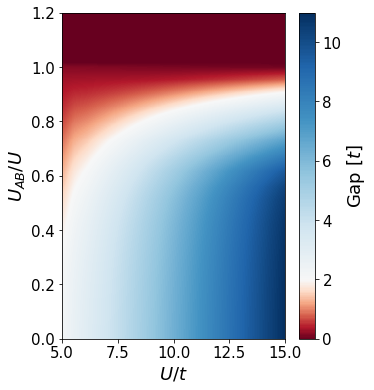

In [186]:
fig, ax = plt.subplots(figsize = (5, 6))
#p1 = ax.pcolormesh(X, Y, Z, norm = colors.TwoSlopeNorm(2, vmin=Z.min(), vmax=Z.max()), cmap = "RdBu")
p1 = ax.pcolormesh(xinterp, yinterp, Zinterp.T, norm = colors.TwoSlopeNorm(2, vmin=Z.min(), vmax=Z.max()), cmap = "RdBu")
ax.set_xlabel(r"$U/t$", fontsize = 18)
ax.set_ylabel(r"$U_{AB}/U$", fontsize = 18)
ax.tick_params(labelsize = 15)

cb = plt.colorbar(p1)
cb.set_label(r"Gap [$t$]", fontsize = 18)
cb.ax.tick_params(labelsize = 15)

### Plot SPDF

In [104]:
rawdat = np.loadtxt("spdf_results.txt", delimiter = "\t")
dimlessUs = rawdat[:, 0]
uRatio = rawdat[:, 1]
spdfs = rawdat[:, 2]

Lifted some data from Fig. 5.5 in [Cody's thesis](https://dspace.mit.edu/handle/1721.1/123353). Let's try and overlap this with some of the calculations.

In [105]:
expdat = np.loadtxt("burton-data.txt", delimiter = ",")
uRatio_exp = expdat[:, 0]
spdfs_exp = expdat[:, 1]

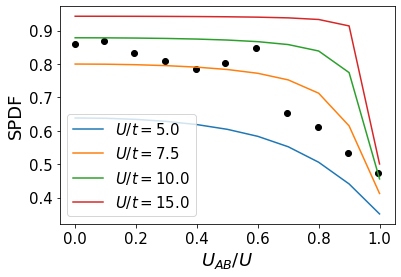

In [106]:
fig, ax = plt.subplots(figsize = (6, 4))
for u in np.unique(dimlessUs):
    selids = (dimlessUs == u)
    ax.plot(uRatio[selids], spdfs[selids], label = r"$U/t = %.1f$" % u)

ax.scatter(uRatio_exp, spdfs_exp, color = 'k')

ax.set_xlabel(r"$U_{AB}/U$", fontsize = 18)
ax.set_ylabel(r"SPDF", fontsize = 18)
ax.legend(fontsize = 15)
ax.tick_params(labelsize = 15)